In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [37]:
with_mask_df = os.listdir('/content/drive/MyDrive/Colab Notebooks/datasets/face_mask/with_mask')
print(with_mask_df[0:5])
print(with_mask_df[-5:])

['with_mask_3497.jpg', 'with_mask_3369.jpg', 'with_mask_340.jpg', 'with_mask_3425.jpg', 'with_mask_3353.jpg']
['with_mask_1241.jpg', 'with_mask_1779.jpg', 'with_mask_130.jpg', 'with_mask_1631.jpg', 'with_mask_1199.jpg']


In [38]:
without_mask_df = os.listdir('/content/drive/MyDrive/Colab Notebooks/datasets/face_mask/without_mask')
print(without_mask_df[0:5])
print(without_mask_df[-5:])

['without_mask_336.jpg', 'without_mask_3594.jpg', 'without_mask_3779.jpg', 'without_mask_2910.jpg', 'without_mask_3131.jpg']
['without_mask_1539.jpg', 'without_mask_2578.jpg', 'without_mask_13.jpg', 'without_mask_2533.jpg', 'without_mask_2492.jpg']


In [39]:
print('Number of images with mask :', len(with_mask_df))
print('Number of images without mask :', len(without_mask_df))

Number of images with mask : 3725
Number of images without mask : 3828


In [40]:
#CREATING LABELS

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [41]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [42]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [43]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


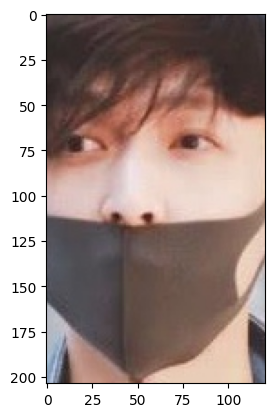

In [44]:
#Image with mask

img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/datasets/face_mask/with_mask/with_mask_1001.jpg')
imgplot = plt.imshow(img)
plt.show()

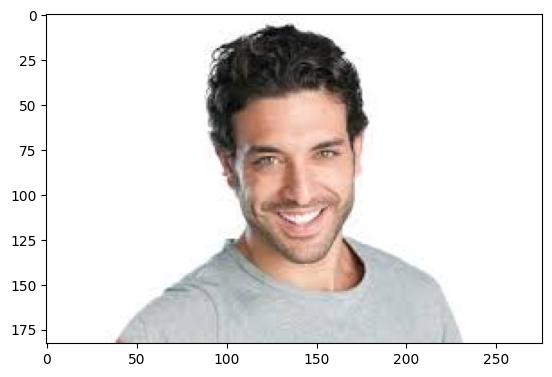

In [45]:
#Image without mask
img = mpimg.imread('/content/drive/MyDrive/Colab Notebooks/datasets/face_mask/without_mask/without_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

In [46]:
# RESIZE IMAGES AND CONVERTING TO NUMPY ARRAYS

with_mask_path = '/content/drive/MyDrive/Colab Notebooks/datasets/face_mask/with_mask/'

data = []

for img_file in with_mask_df:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/drive/MyDrive/Colab Notebooks/datasets/face_mask/without_mask/'

for img_file in without_mask_df:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [47]:
type(data)

list

In [48]:
len(data)

7553

In [49]:
data[0]

array([[[132, 138, 137],
        [135, 142, 138],
        [130, 142, 140],
        ...,
        [ 57,  78,  33],
        [ 62,  83,  35],
        [ 66,  90,  36]],

       [[136, 141, 145],
        [145, 152, 151],
        [136, 148, 146],
        ...,
        [ 66,  91,  41],
        [ 65,  89,  39],
        [ 64,  88,  37]],

       [[134, 140, 137],
        [139, 147, 141],
        [132, 144, 142],
        ...,
        [ 68,  95,  43],
        [ 63,  87,  38],
        [ 61,  83,  36]],

       ...,

       [[177, 185, 191],
        [174, 186, 191],
        [173, 185, 190],
        ...,
        [167, 158, 157],
        [164, 159, 157],
        [164, 159, 160]],

       [[176, 187, 193],
        [174, 186, 192],
        [174, 186, 192],
        ...,
        [165, 159, 159],
        [164, 159, 160],
        [163, 159, 160]],

       [[176, 187, 193],
        [175, 186, 192],
        [173, 186, 192],
        ...,
        [162, 159, 161],
        [164, 161, 163],
        [166, 161, 162]]

In [50]:
type(data[0])

numpy.ndarray

In [51]:
data[0].shape

(128, 128, 3)

In [52]:
#CONVERTING IMAGE LIST AND LABEL LIST TO NUMPY ARRAYS

X = np.array(data)
Y = np.array(labels)

In [53]:
type(Y)

numpy.ndarray

In [54]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [55]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=2)

In [56]:
print(X.shape, xtrain.shape, xtest.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [57]:
print(Y.shape, ytrain.shape, ytest.shape)

(7553,) (6042,) (1511,)


In [58]:
xtrain_scaled = xtrain/255

xtest_scaled = xtest/255

In [59]:
xtrain[0]

array([[[ 37,  34,  43],
        [ 36,  33,  42],
        [ 36,  33,  42],
        ...,
        [ 38,  40,  53],
        [ 38,  40,  53],
        [ 39,  41,  54]],

       [[ 37,  34,  43],
        [ 37,  34,  43],
        [ 37,  34,  43],
        ...,
        [ 38,  40,  53],
        [ 38,  40,  53],
        [ 37,  39,  52]],

       [[ 37,  34,  43],
        [ 38,  35,  44],
        [ 38,  35,  44],
        ...,
        [ 37,  39,  52],
        [ 37,  39,  52],
        [ 36,  38,  51]],

       ...,

       [[ 96,  91,  87],
        [ 88,  83,  79],
        [ 75,  70,  66],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [251, 252, 254]],

       [[116, 109, 103],
        [109, 102,  96],
        [ 98,  91,  85],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [251, 252, 254]],

       [[126, 117, 110],
        [121, 112, 105],
        [112, 103,  97],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [251, 252, 254]]

In [60]:
xtrain_scaled[0]

array([[[0.14509804, 0.13333333, 0.16862745],
        [0.14117647, 0.12941176, 0.16470588],
        [0.14117647, 0.12941176, 0.16470588],
        ...,
        [0.14901961, 0.15686275, 0.20784314],
        [0.14901961, 0.15686275, 0.20784314],
        [0.15294118, 0.16078431, 0.21176471]],

       [[0.14509804, 0.13333333, 0.16862745],
        [0.14509804, 0.13333333, 0.16862745],
        [0.14509804, 0.13333333, 0.16862745],
        ...,
        [0.14901961, 0.15686275, 0.20784314],
        [0.14901961, 0.15686275, 0.20784314],
        [0.14509804, 0.15294118, 0.20392157]],

       [[0.14509804, 0.13333333, 0.16862745],
        [0.14901961, 0.1372549 , 0.17254902],
        [0.14901961, 0.1372549 , 0.17254902],
        ...,
        [0.14509804, 0.15294118, 0.20392157],
        [0.14509804, 0.15294118, 0.20392157],
        [0.14117647, 0.14901961, 0.2       ]],

       ...,

       [[0.37647059, 0.35686275, 0.34117647],
        [0.34509804, 0.3254902 , 0.30980392],
        [0.29411765, 0

In [61]:
#Building CNN

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [62]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
training = model.fit(xtrain_scaled, ytrain, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 185s 1s/step - loss: 0.4668 - accuracy: 0.7920 - val_loss: 0.2728 - val_accuracy: 0.8760
Epoch 2/10
170/170 [==============================] - 185s 1s/step - loss: 0.2909 - accuracy: 0.8821 - val_loss: 0.2515 - val_accuracy: 0.8909
Epoch 3/10
170/170 [==============================] - 184s 1s/step - loss: 0.2441 - accuracy: 0.9058 - val_loss: 0.2117 - val_accuracy: 0.9074
Epoch 4/10
170/170 [==============================] - 178s 1s/step - loss: 0.2229 - accuracy: 0.9169 - val_loss: 0.1960 - val_accuracy: 0.9107
Epoch 5/10
170/170 [==============================] - 179s 1s/step - loss: 0.1811 - accuracy: 0.9248 - val_loss: 0.1810 - val_accuracy: 0.9306
Epoch 6/10
170/170 [==============================] - 178s 1s/step - loss: 0.1565 - accuracy: 0.9406 - val_loss: 0.1603 - val_accuracy: 0.9421
Epoch 7/10
170/170 [==============================] - 183s 1s/step - loss: 0.1256 - accuracy: 0.9513 - val_loss: 0.1937 - val_accuracy: 0.9339

In [64]:
loss, accuracy = model.evaluate(xtest_scaled, ytest)
print('Test Accuracy : ', accuracy)
print('Test Loss : ', loss)

48/48 [==============================] - 11s 227ms/step - loss: 0.2497 - accuracy: 0.9312
Test Accuracy :  0.9311714172363281
Test Loss :  0.24966402351856232


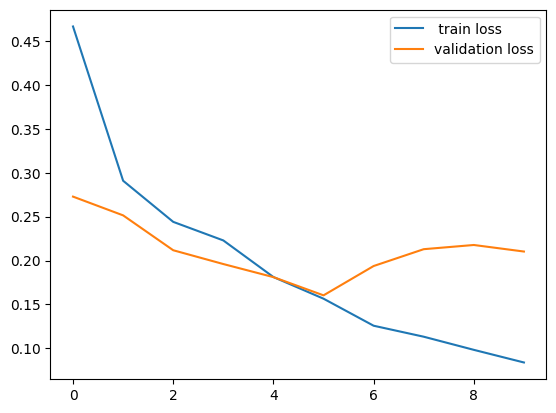

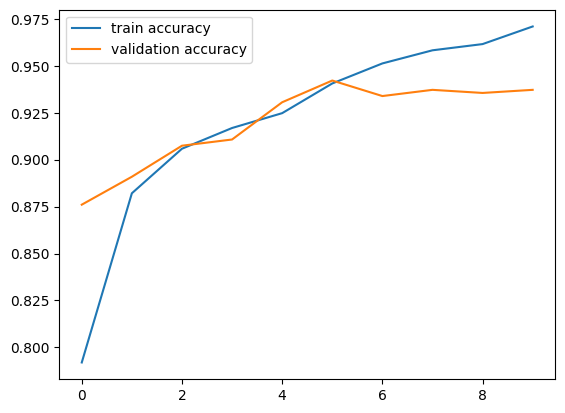

In [65]:
h = training

plt.plot(h.history['loss'], label=' train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/drive/MyDrive/Colab Notebooks/datasets/face_mask/without_mask/without_mask_100.jpg


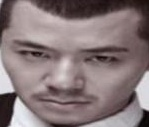

1/1 [==============================] - 0s 93ms/step
[[0.65086555 0.33837485]]
0
The person in the image is not wearing a mask


In [66]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

elif input_pred_label == 0:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/drive/MyDrive/Colab Notebooks/datasets/face_mask/with_mask/with_mask_1001.jpg


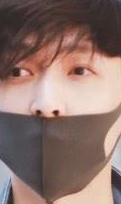

1/1 [==============================] - 0s 76ms/step
[[0.18019278 0.55286777]]
1
The person in the image is wearing a mask


In [67]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

elif input_pred_label == 0:

  print('The person in the image is not wearing a mask')